In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd
from scipy import fftpack
from matplotlib.colors import LogNorm
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414
p-value = 0.0005279431738299246

The p-value is smaller than alpha(0,05) so we reject the null hypothesis. 


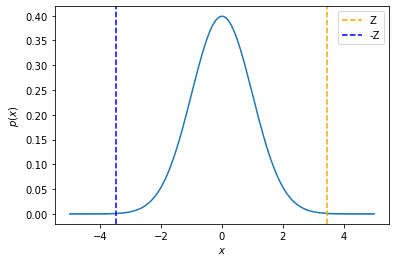

In [20]:
mu = 6.3
sigma = mt.sqrt(mu) #Poisson variance
x0 = 15

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
print("\nThe p-value is smaller than alpha(0,05) so we reject the null hypothesis. ")

# plot the test statistics and its pdf
x = np.linspace(-5, +5, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange', label = "Z")
plt.axvline(-Z, linestyle='--', color='blue', label = "-Z")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()




2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

The T value is equal to:  -3.786997938137629
p-value = 0.004302464132864604

The p-value is smaller than alpha(0,05) so we reject the null hypothesis. 


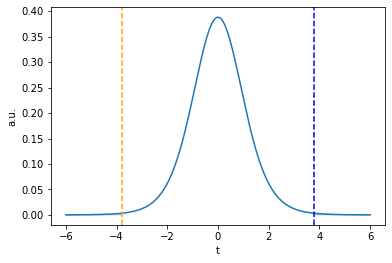

In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

#Calculate the mean
mean_pre = np.mean(pre)
mean_post = np.mean(post)

#Calculate the variance
sigma_pre = np.sqrt(np.var(pre, ddof=1)) 
sigma_post = np.sqrt(np.var(post, ddof=1)) 

#Calculate sigma
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

#Calculate T
T = (mean_pre - mean_post) / (sigma * np.sqrt(2/n))
print("The T value is equal to: ",T)

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("\nThe p-value is smaller than alpha(0,05) so we reject the null hypothesis. ")

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()



3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [8]:
data = "data/populations.txt"
df = pd.read_table(data,sep = "\t")
df

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


In [10]:
def period(sig):
    # The FFT of the signal
    sig_fft = fftpack.fft(sig)

    # The power 
    power = np.abs(sig_fft) 
    # The return the corresponding frequencies
    sample_freq = fftpack.fftfreq(sig.size)
    # Find the peak frequency: focus only on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powers = power[pos_mask]
    # find the max of freqs array
    peak_freq = freqs[powers.argmax()]
    
    return (1/peak_freq)

sig_hare = df['hare']
sig_hare = np.array(sig_hare)
sig_lynx = df['lynx']
sig_lynx = np.array(sig_lynx)
sig_carrot = df['carrot']
sig_carrot = np.array(sig_carrot)

T_hare = period(sig_hare)
T_lynx = period(sig_lynx)
T_carrot = period(sig_carrot)

print("The period of hare is T = ", T_hare)
print("The period of lynx is T = ", T_lynx)
print("The period of carrot is T = ", T_carrot)

The period of hare is T =  10.5
The period of lynx is T =  10.5
The period of carrot is T =  10.5


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Fourier transform')

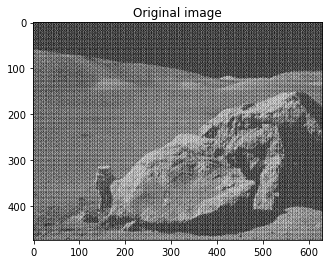

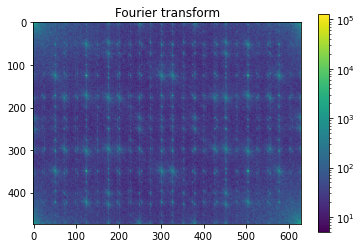

In [12]:
im = plt.imread('data/moonlanding.png').astype(float)


r, c= im.shape

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

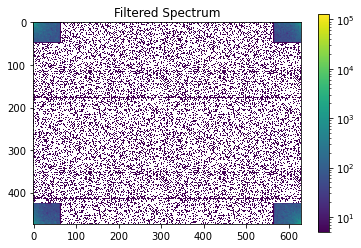

In [15]:
# In the lines following, we'll make a copy of the original spectrum and truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. 
im_fft2 = im_fft.copy()

# Set to zero all rows/columns with indices between r*keep_fraction and r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')


Text(0.5, 1.0, 'Reconstructed Image')

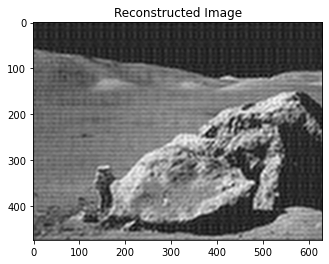

In [16]:
# Reconstruct the denoised image from the filtered spectrum, keep only the real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')